Based on [scikit-learn MOOC](https://github.com/INRIA/scikit-learn-mooc)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Import Toy Dataset from SciKit-Learn

[SciKit-Learn Dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html)

In [ ]:
import sklearn.datasets as datasets

features, target = datasets.load_breast_cancer(return_X_y=True, as_frame=True)
data = pd.concat([features, target], axis=1)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Exploratory Data Analysis

In [ ]:
print(f"The dataset contains {features.shape[1]} features and {features.shape[0]} samples")
print()
features_names = list(features.columns)
print(f"We have to predict the target, using the following variables:\n{features_names}")
print()
print(f"The features set contains the following data types:\n{features.dtypes}")
print()
print("Check NaN values")
print(data.info())
print()
print("Variables and Target Ranges")
print(f"The target is a variable of carinality {target.nunique()} with values {target.unique()}")
print(f"Description of features")
filter_feat = [col for col in data if col.startswith('mean')]
print(features[filter_feat].describe())
print()
print('Check target classes')
print(target.value_counts())

The dataset contains 30 features and 569 samples

We have to predict the target, using the following variables:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

The features set contains the following data types:
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave p

# Target Count Plot

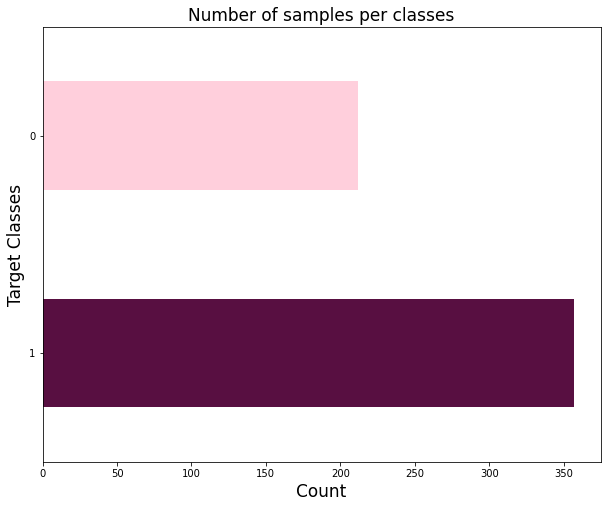

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
target.value_counts().plot.barh(color=['#580f41', '#ffcfdc'])
ax.set_xlabel('Count', fontsize=17)
ax.set_ylabel('Target Classes', fontsize=17)
ax.set_title("Number of samples per classes", fontsize=17)
plt.show()

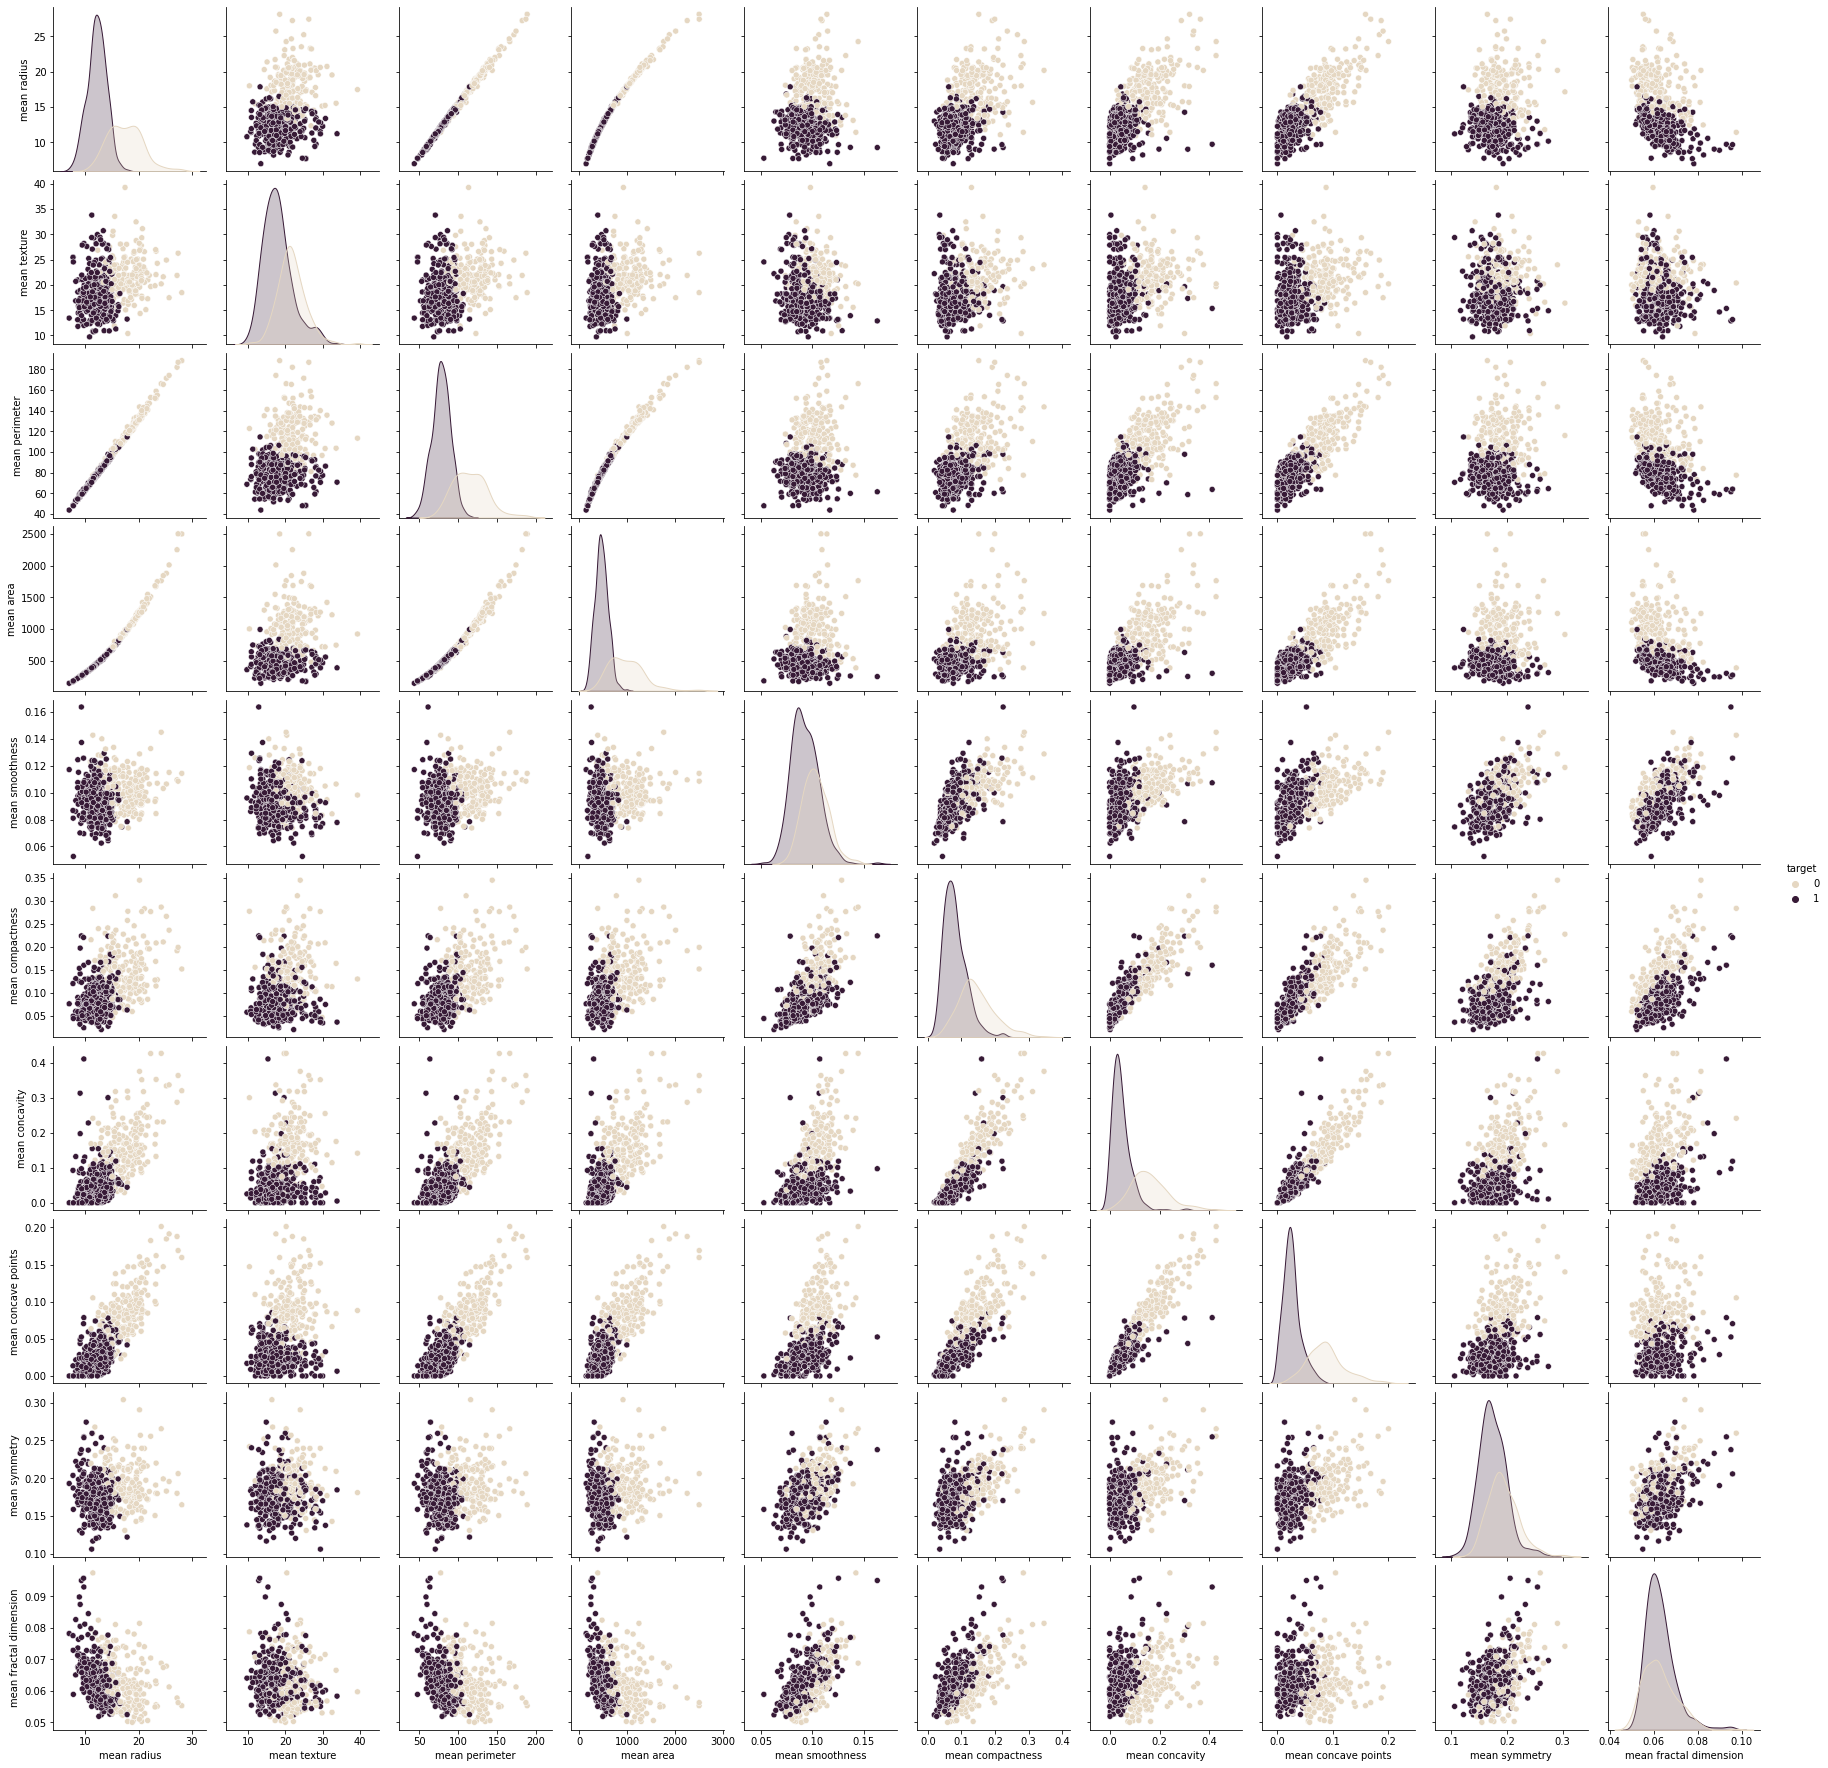

In [ ]:
df = pd.concat([features[filter_feat], target], axis=1)
sns.pairplot(data=df, hue="target", palette="ch:.25")

# Cross Validate

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn import set_config
set_config(display='diagram')
model = make_pipeline(StandardScaler(),LogisticRegression(penalty="none"))
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(penalty='none'))])

In [ ]:
from sklearn.model_selection import cross_validate

cv = cross_validate(model, features, target,
                    cv=5,  
                    return_estimator=True, return_train_score=True, n_jobs=2)
cv_df = (pd.DataFrame({f'Train_Accuracy':cv['train_score'], 
                       f'Test_Accuracy':cv['test_score']}, index=[f"Fold {i}" for i in range(1,6)]))   


print("Cross validate")
print(f"Average Accuracy on training set "
      f"{cv['train_score'].mean():.3f} +/- "
      f"{cv['train_score'].std():.3f}")
print(f"Average Accuracy on test set "
      f"{cv['test_score'].mean():.3f} +/- "
      f"{cv['test_score'].std():.3f}")
print()
print(cv_df)


Cross validate
Average Accuracy on training set 0.997 +/- 0.005
Average Accuracy on test set 0.956 +/- 0.012

        Train_Accuracy  Test_Accuracy
Fold 1        1.000000       0.947368
Fold 2        1.000000       0.938596
Fold 3        1.000000       0.956140
Fold 4        1.000000       0.964912
Fold 5        0.986842       0.973451


# Benchmark Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(features,target,test_size=0.3, random_state = 42)

In [ ]:
benchmark_model = model.fit(x_train, y_train)
y_train_hat = benchmark_model.predict(x_train)
y_test_hat = benchmark_model.predict(x_test)

In [ ]:
coefs = pd.DataFrame(
        model.named_steps['logisticregression'].coef_[0],
        columns=['Coefficient'], index=features_names
    ).round(3)
coefs = coefs.reset_index()
coefs.columns = ['Feature', 'Coefficient']
coefs = coefs.sort_values(['Coefficient'], ascending=False)
coefs

,Feature,Coefficient
5,mean compactness,611.881
19,fractal dimension error,317.559
18,symmetry error,219.464
8,mean symmetry,166.767
24,worst smoothness,158.684
25,worst compactness,147.029
16,concavity error,124.916
2,mean perimeter,105.819
11,texture error,102.987
22,worst perimeter,93.761


In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_test_hat):.3f}")

Accuracy: 0.959


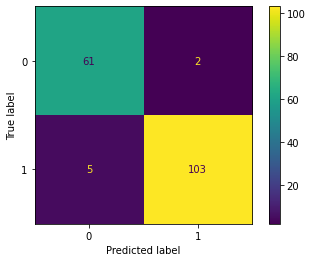

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_hat, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

# Improve the model!
- Dimensionality Reduction
- Hyperparameter Tuning
- Use different splitting techniques, such as Stratified Kfold CV